In [2]:
import scipy as sp
import numpy as np
from scipy import integrate

In [3]:
m = 0.1
L = 0.5
g = 9.82

def func(t, y):
    
    y1, y2, y3, y4 = y[0], y[1], y[2], y[3]
    
    dy1 = 6/(m*L**2) * (2 * y3 - 3 * np.cos(y1 - y2) * y4)\
          /(16 - 9*np.cos(y1 - y2)**2)
    dy2 = 6/(m*L**2) * (8 * y4 - 3 * np.cos(y1 - y2) * y3)\
          /(16 - 9*np.cos(y1 - y2)**2)
    dy3 = - 1/2 * m*L**2 * (dy1*dy2*np.sin(y1-y2) + 3 * g/L * np.sin(y1))
    dy4 = - 1/2 * m*L**2 * (-dy1*dy2*np.sin(y1-y2) + g/L*np.sin(y2))
    
    return [dy1, dy2, dy3, dy4]

In [4]:
y0s = [np.pi/3, 0, 0, 0]
t_start = 0
t_finish = 10

t_steps = 500

t_span = (t_start, t_finish)
t = np.linspace(t_start, t_finish, t_steps)

In [5]:
solution = sp.integrate.solve_ivp(func, t_span, y0s, t_eval = t)

In [6]:
thetas = solution.y

(1.0, -1.0)

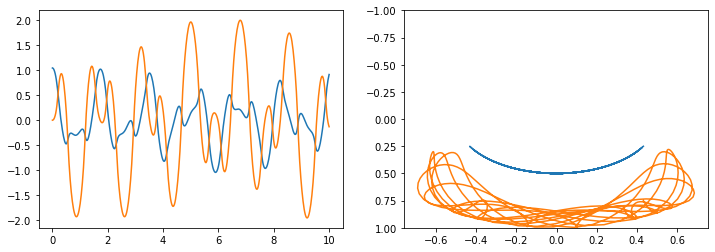

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize = (12,4))

axes[0].plot(t, thetas[0,:])
axes[0].plot(t, thetas[1,:])

x1 = L * np.sin(thetas[0,:])
y1 = L * np.cos(thetas[0,:])

x2 = x1 + L*np.sin(thetas[1,:])
y2 = y1 + L*np.cos(thetas[1,:])

axes[1].plot(x1, y1)
axes[1].plot(x2, y2)
axes[1].set_ylim([-1,0])
axes[1].set_ylim([1,-1])

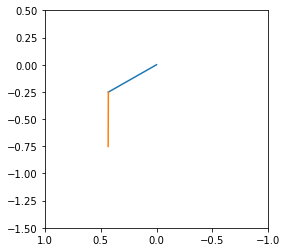

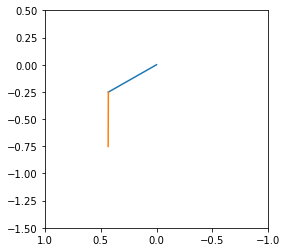

In [9]:
from IPython.display import display, clear_output
import time

fig, ax = plt.subplots(figsize = (4,4))

for t_id, tt in enumerate(t[:2]):
    
    x1 = L * np.sin(thetas[0,t_id])
    y1 = -L * np.cos(thetas[0,t_id])

    x2 = x1 + L*np.sin(thetas[1,t_id])
    y2 = y1 - L*np.cos(thetas[1,t_id])
    
    ax.cla()
    ax.plot([0, x1], [0, y1])
    ax.plot([x1, x2], [y1,y2])
    ax.set_ylim([-1.5,0.5])
    ax.set_xlim([1,-1])
    
    clear_output()
    display(fig)

In [10]:
sleep_time = (t_finish - t_start)/t_steps

In [12]:
%matplotlib qt

fig, ax = plt.subplots(figsize=(4,4))

pendulum1, = ax.plot([0, x1], [0, y1], 'r.-', animated = True)
pendulum2, = ax.plot([x1, x2], [y1,y2], 'b.-', animated = True)
ax.set_ylim([-1.5,0.5])
ax.set_xlim([1,-1])

plt.show(block=False)
plt.pause(0.1)

bg = fig.canvas.copy_from_bbox(fig.bbox)

ax.draw_artist(pendulum1)
ax.draw_artist(pendulum2)

fig.canvas.blit(fig.bbox)

for t_id, tt in enumerate(t[:]):
    fig.canvas.restore_region(bg)

    x1 = L * np.sin(thetas[0,t_id])
    y1 = -L * np.cos(thetas[0,t_id])

    x2 = x1 + L*np.sin(thetas[1,t_id])
    y2 = y1 - L*np.cos(thetas[1,t_id])
    
    pendulum1.set_data([0, x1], [0, y1])
    pendulum2.set_data([x1, x2], [y1,y2])
    
    ax.draw_artist(pendulum1)
    ax.draw_artist(pendulum2)

    fig.canvas.blit(fig.bbox)
    fig.canvas.flush_events()
    
    time.sleep(sleep_time)